In [335]:
import argparse
import os
import math
import random

import torch as th
import torch.distributed as dist
import torchvision as tv
import blobfile as bf
from PIL import Image
import warnings
import numpy as np
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import itertools
import torch

warnings.filterwarnings('ignore')
class Arguments(object):
    def __init__(self, dictionary):
        """Constructor"""
        for key in dictionary:
            setattr(self, key, dictionary[key])
            
def read_pil(path, d1=False):
    with bf.BlobFile(path, "rb") as f:
        pil_image = Image.open(f)
        pil_image.load()
        if d1:
            pil_image = pil_image.convert("L")
        else:
            pil_image = pil_image.convert("RGB")
    return pil_image

In [2]:
def color_class_map(class_map, class_id=0):
    cmap = np.array([[0,0,0],
                     [0, 0, 255], # Blue
                     [255, 0, 0], # Red
                     [255, 128, 0], # Orange
                     [255, 255, 0], # Yellow
                     [0, 255, 0], # Green 
                     [128, 0, 255]]) # Purple
    
    image = np.uint8(np.array(class_map))
    
    if class_id != 0:
        image[image != class_id] = 0
    
    return Image.fromarray(cmap[image].astype(np.uint8))

In [3]:
def show_mask(img, idx, thres=0.7):
    
#     img_s = img[idx]
#     # img_s[img_s < 0] = 0
#     # img_s[img_s > thres] = 1
    
#     mask = img_s
    
    mask = th.round(img[idx].cpu())
    
    # Get the number of channels
    num_channels = mask.shape[0]

    # Create a 1D index tensor for the channels
    channel_indices = th.arange(num_channels)

    # Multiply each channel of the image with the index
    result = mask * channel_indices.view(-1, 1, 1)
    
    mask = th.sum(result, dim=0)
    mask[mask > 6] = 0
    
    return color_class_map(mask)

In [315]:
idx = -23

In [316]:
img_zip = np.load("/scratch/as3ek/github/MaskDiff/saves/lr_0.0001__batch_size_64__image_size_128__num_channels_128__num_res_blocks_3__diffusion_steps_4000__noise_schedule_linear/model310000_samples/samples_1280x7x128x128.npz")

In [317]:
img = th.tensor(list(img_zip.items())[0][1][idx])

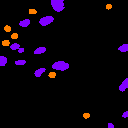

In [318]:
show_mask(img.unsqueeze(0), 0)

In [324]:
img_zip = np.load("/scratch/as3ek/github/MaskDiff/saves/lr_0.0001__batch_size_64__image_size_128__num_channels_128__num_res_blocks_3__diffusion_steps_4000__noise_schedule_linear/model210000_samples/samples_1280x7x128x128.npz")

In [325]:
img = th.tensor(list(img_zip.items())[0][1][idx])

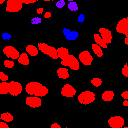

In [326]:
show_mask(img.unsqueeze(0), 0)

In [343]:
def num_classes_to_labels(num_classes = 7):
    # Generate all possible combinations of class labels
    all_labels = list(itertools.product([0, 1], repeat=num_classes))
    # Convert class labels to one-hot tensors
    one_hot_labels = [torch.tensor(label) for label in all_labels]

    return torch.stack(one_hot_labels).float()

[1. 0. 0. 0. 0. 0. 0.]


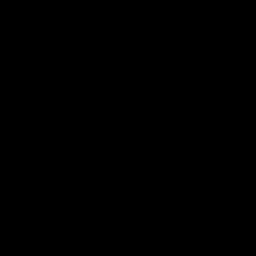

[1. 0. 0. 0. 0. 0. 1.]


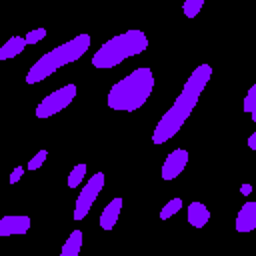

[1. 0. 0. 0. 0. 1. 0.]


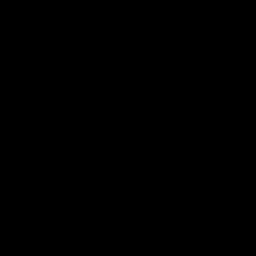

[1. 0. 0. 0. 0. 1. 1.]


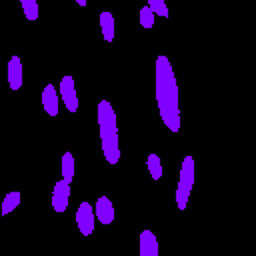

[1. 0. 0. 0. 1. 0. 0.]


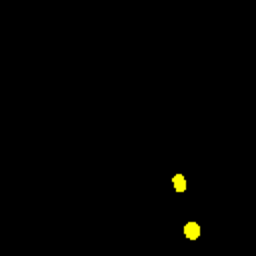

[1. 0. 0. 0. 1. 0. 1.]


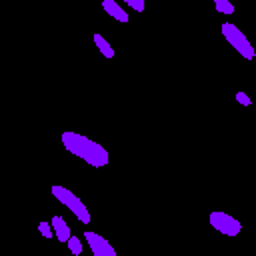

[1. 0. 0. 0. 1. 1. 0.]


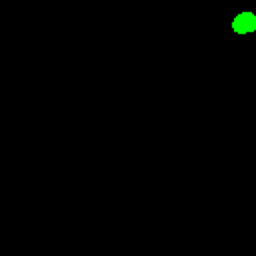

[1. 0. 0. 0. 1. 1. 1.]


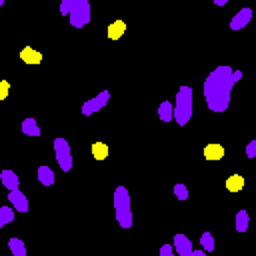

[1. 0. 0. 1. 0. 0. 0.]


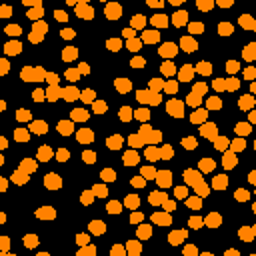

[1. 0. 0. 1. 0. 0. 1.]


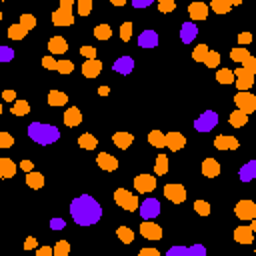

[1. 0. 0. 1. 0. 1. 0.]


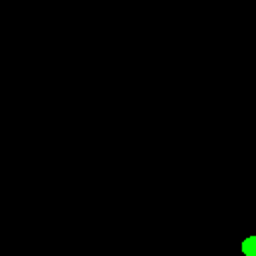

[1. 0. 0. 1. 0. 1. 1.]


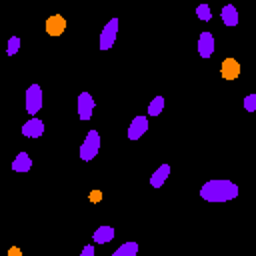

[1. 0. 0. 1. 1. 0. 0.]


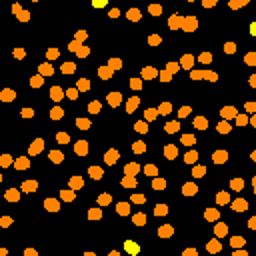

[1. 0. 0. 1. 1. 0. 1.]


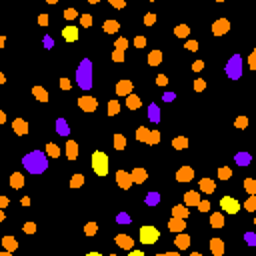

[1. 0. 0. 1. 1. 1. 0.]


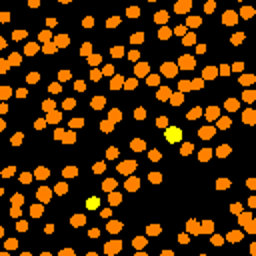

[1. 0. 0. 1. 1. 1. 1.]


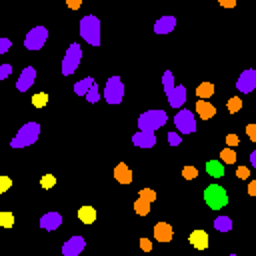

[1. 0. 1. 0. 0. 0. 0.]


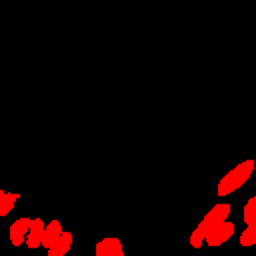

[1. 0. 1. 0. 0. 0. 1.]


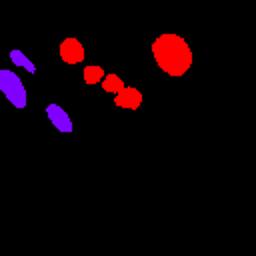

[1. 0. 1. 0. 0. 1. 0.]


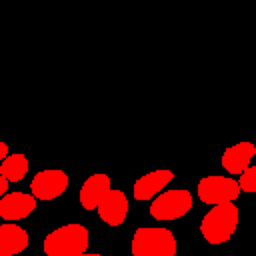

[1. 0. 1. 0. 0. 1. 1.]


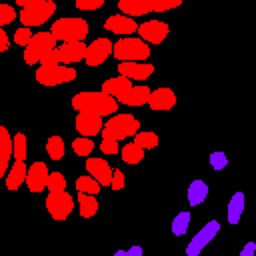

[1. 0. 1. 0. 1. 0. 0.]


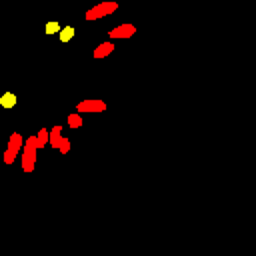

[1. 0. 1. 0. 1. 0. 1.]


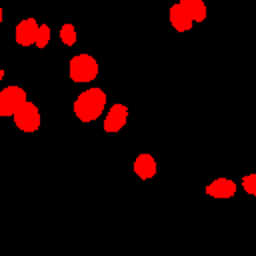

[1. 0. 1. 0. 1. 1. 0.]


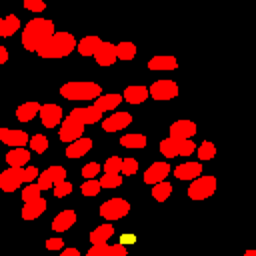

[1. 0. 1. 0. 1. 1. 1.]


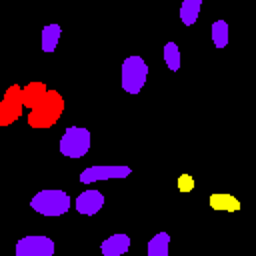

[1. 0. 1. 1. 0. 0. 0.]


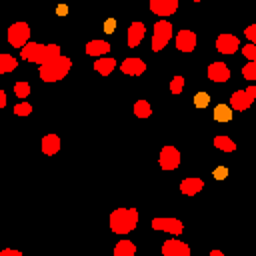

[1. 0. 1. 1. 0. 0. 1.]


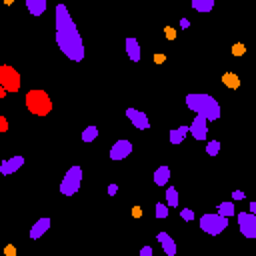

[1. 0. 1. 1. 0. 1. 0.]


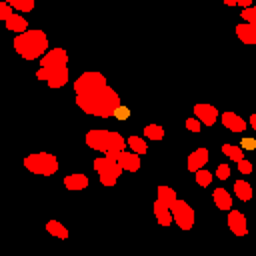

[1. 0. 1. 1. 0. 1. 1.]


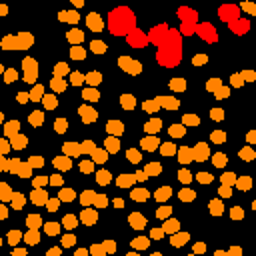

[1. 0. 1. 1. 1. 0. 0.]


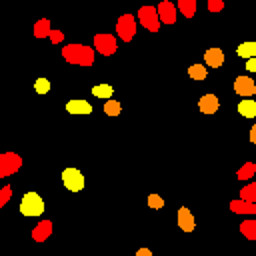

[1. 0. 1. 1. 1. 0. 1.]


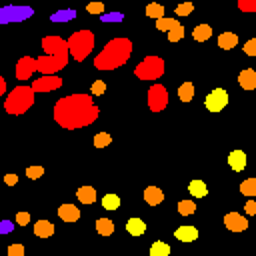

[1. 0. 1. 1. 1. 1. 0.]


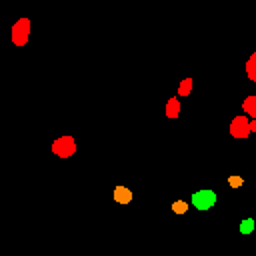

[1. 0. 1. 1. 1. 1. 1.]


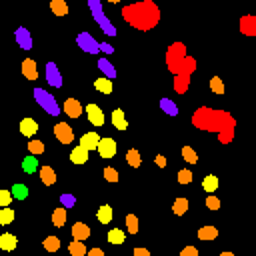

[1. 1. 0. 0. 0. 0. 0.]


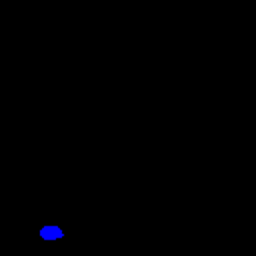

[1. 1. 0. 0. 0. 0. 1.]


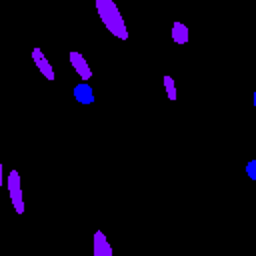

[1. 1. 0. 0. 0. 1. 0.]


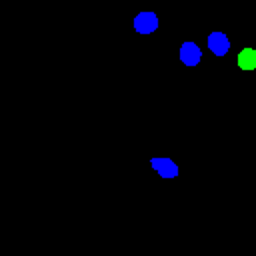

[1. 1. 0. 0. 0. 1. 1.]


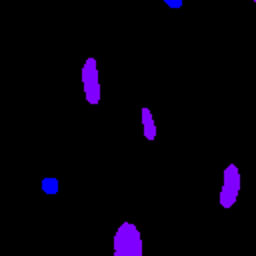

[1. 1. 0. 0. 1. 0. 0.]


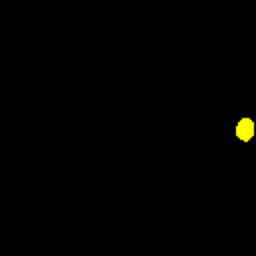

[1. 1. 0. 0. 1. 0. 1.]


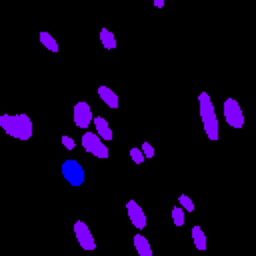

[1. 1. 0. 0. 1. 1. 0.]


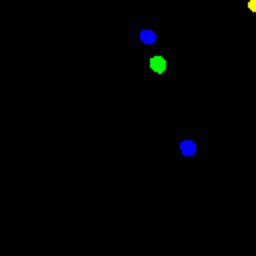

[1. 1. 0. 0. 1. 1. 1.]


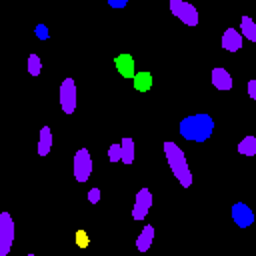

[1. 1. 0. 1. 0. 0. 0.]


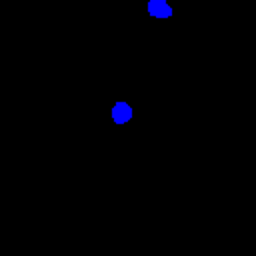

[1. 1. 0. 1. 0. 0. 1.]


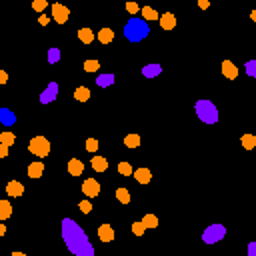

[1. 1. 0. 1. 0. 1. 0.]


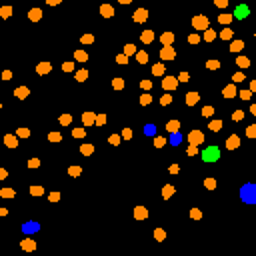

[1. 1. 0. 1. 0. 1. 1.]


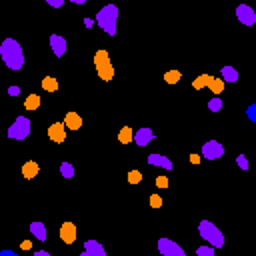

[1. 1. 0. 1. 1. 0. 0.]


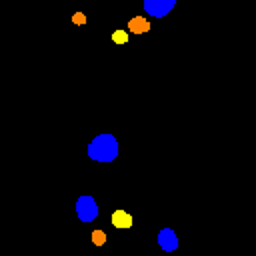

[1. 1. 0. 1. 1. 0. 1.]


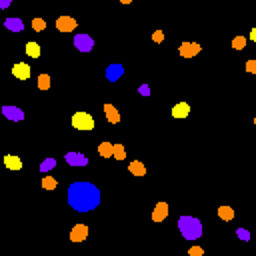

[1. 1. 0. 1. 1. 1. 0.]


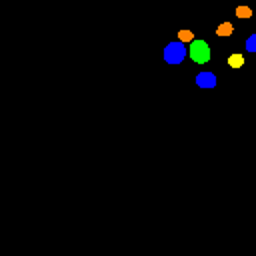

[1. 1. 0. 1. 1. 1. 1.]


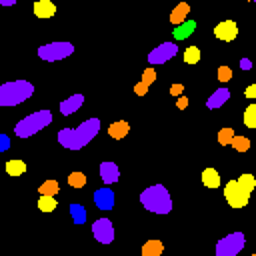

[1. 1. 1. 0. 0. 0. 0.]


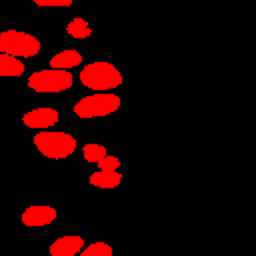

[1. 1. 1. 0. 0. 0. 1.]


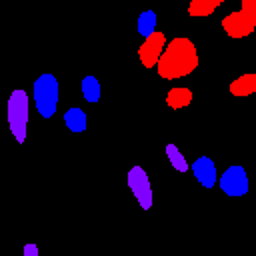

[1. 1. 1. 0. 0. 1. 0.]


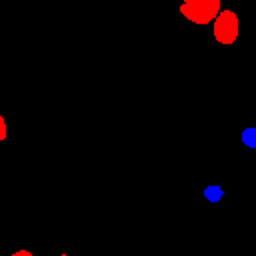

[1. 1. 1. 0. 0. 1. 1.]


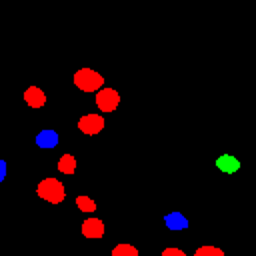

[1. 1. 1. 0. 1. 0. 0.]


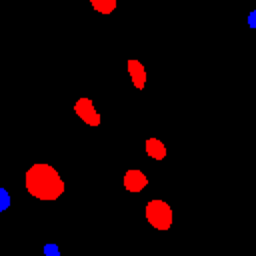

[1. 1. 1. 0. 1. 0. 1.]


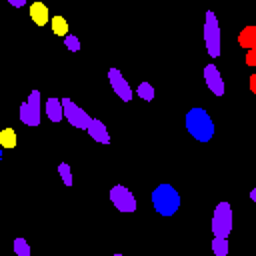

[1. 1. 1. 0. 1. 1. 0.]


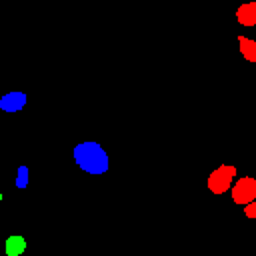

[1. 1. 1. 0. 1. 1. 1.]


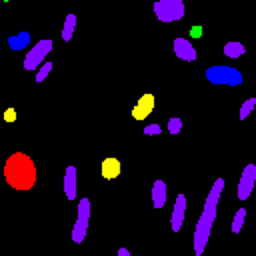

[1. 1. 1. 1. 0. 0. 0.]


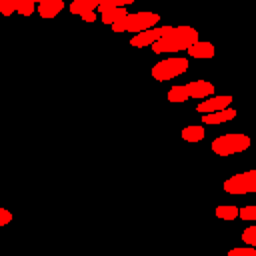

[1. 1. 1. 1. 0. 0. 1.]


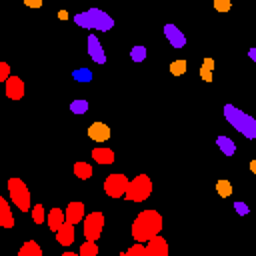

[1. 1. 1. 1. 0. 1. 0.]


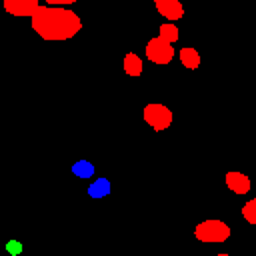

[1. 1. 1. 1. 0. 1. 1.]


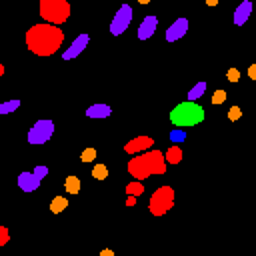

[1. 1. 1. 1. 1. 0. 0.]


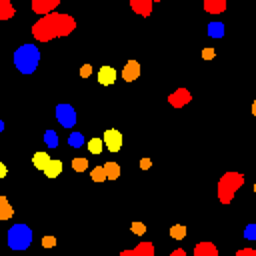

[1. 1. 1. 1. 1. 0. 1.]


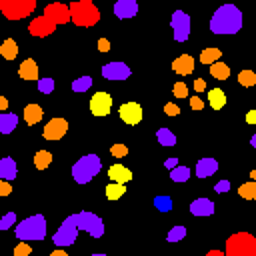

[1. 1. 1. 1. 1. 1. 0.]


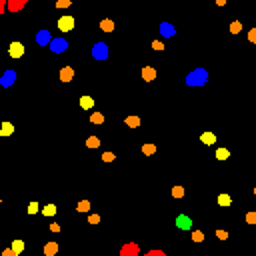

[1. 1. 1. 1. 1. 1. 1.]


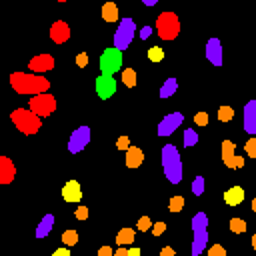

In [351]:
for idx in range(64):
    img = th.tensor(list(img_zip.items())[0][1][512 + 64 + idx])
    print(num_classes_to_labels(7)[64 + idx].cpu().numpy())
    display(show_mask(img.unsqueeze(0), 0).resize((256, 256)))